<a href="https://colab.research.google.com/github/reza-debug/Convolutinal_Neural_Netork/blob/main/Conv2D_padding_stride.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data 📢

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [ ]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

# Preprocessing 🥨

In [ ]:
x_train = x_train.reshape((-1,28,28,1)).astype('float') / 255
x_test = x_test.reshape((-1,28,28,1)).astype('float') / 255

In [ ]:
x_train.shape

(60000, 28, 28, 1)

# Model definition 🐶

In [ ]:
model = keras.Sequential()
#conv2D layer
#32 number of filters
#3*3 kernel
#stride 1 column 1 row
#no padding
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1) ))
#Flaten layer for fully conected norun layers
model.add(keras.layers.Flatten())
#hidden layers
model.add(keras.layers.Dense(units=128,activation='relu'))
#output layer
model.add(keras.layers.Dense(units=10,activation='softmax'))

#compile
model.compile( optimizer = tf.optimizers.Adam() , loss = tf.losses.sparse_categorical_crossentropy , metrics=['accuracy'] )



In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 flatten_10 (Flatten)        (None, 21632)             0         
                                                                 
 dense_17 (Dense)            (None, 128)               2769024   
                                                                 
 dense_18 (Dense)            (None, 10)                1290      
                                                                 
Total params: 2770634 (10.57 MB)
Trainable params: 2770634 (10.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hist = model.fit(x_train,y_train, epochs=10 , batch_size=256 , validation_data=(x_test,y_test) )

Epoch 1/10
235/235 [==============================] - 50s 208ms/step - loss: 0.2225 - accuracy: 0.9367 - val_loss: 0.0909 - val_accuracy: 0.9719
Epoch 2/10
235/235 [==============================] - 47s 199ms/step - loss: 0.0616 - accuracy: 0.9820 - val_loss: 0.0589 - val_accuracy: 0.9804
Epoch 3/10
235/235 [==============================] - 49s 209ms/step - loss: 0.0390 - accuracy: 0.9883 - val_loss: 0.0547 - val_accuracy: 0.9820
Epoch 4/10
235/235 [==============================] - 49s 207ms/step - loss: 0.0240 - accuracy: 0.9931 - val_loss: 0.0541 - val_accuracy: 0.9834
Epoch 5/10
235/235 [==============================] - 50s 215ms/step - loss: 0.0166 - accuracy: 0.9953 - val_loss: 0.0471 - val_accuracy: 0.9840
Epoch 6/10
235/235 [==============================] - 49s 209ms/step - loss: 0.0106 - accuracy: 0.9973 - val_loss: 0.0504 - val_accuracy: 0.9848
Epoch 7/10
235/235 [==============================] - 48s 204ms/step - loss: 0.0066 - accuracy: 0.9985 - val_loss: 0.0495 - val_ac

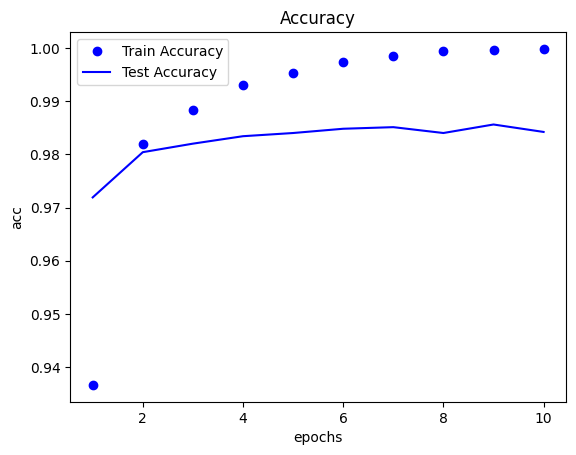

In [60]:
import matplotlib.pyplot as plt

# دسترسی به معیارهای عملکرد آموزش و اعتبارسنجی
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# دسترسی به تعداد دوره‌ها
epochs = range(1, len(accuracy) + 1)

# رسم نمودار دقت آموزش و اعتبارسنجی
plt.plot(epochs, accuracy, 'bo', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()